A machine learning approach to predict product purchase analyzing user's social network ad click.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pattern project/Social_Network_Ads-v4.csv')
df.head(15)
# df
#df.describe()
#df.Country.unique().sort()
#print(df.Country.unique())

,User ID,Gender,Age,EstimatedSalary,Daily Internet Use (Min),Daily Social Media Use (Min),City,Country,Purchased
0,15566689,Female,35,57000.0,256.09,68.95,Wrightburgh,Tunisia,No
1,15569641,Female,58,95000.0,193.77,80.23,West Jodi,Nauru,Yes
2,15570769,Female,26,80000.0,236.50,69.47,Davidton,San Marino,No
3,15570932,Male,34,115000.0,245.89,74.15,West Terrifurt,Italy,No
4,15571059,Female,33,41000.0,225.58,68.37,South Manuel,Iceland,No
5,15573452,Female,21,16000.0,226.74,59.99,Jamieberg,Norway,No
6,15573926,Male,40,71000.0,208.36,88.91,Brandonstad,Myanmar,Yes
7,15574305,Male,35,53000.0,131.76,66.00,Port Jefferybury,Australia,No
8,15574372,Female,58,47000.0,221.51,74.53,West Colin,Grenada,Yes
9,15575002,Female,35,60000.0,183.82,69.88,Ramirezton,Ghana,No


#Preprocessing

## Normalisation

In [ ]:
# df['EstimatedSalary'] = preprocessing.MinMaxScaler().fit_transform(df[['EstimatedSalary']])
# df['Daily Internet Use (Min)'] = preprocessing.MinMaxScaler().fit_transform(df[['Daily Internet Use (Min)']])
df['Daily Social Media Use (Min)'] = preprocessing.MinMaxScaler().fit_transform(df[['Daily Social Media Use (Min)']])

df.head(20)

,User ID,Gender,Age,EstimatedSalary,Daily Internet Use (Min),Daily Social Media Use (Min),City,Country,Purchased
0,15566689,Female,35,57000.0,256.09,0.617882,Wrightburgh,Tunisia,No
1,15569641,Female,58,95000.0,193.77,0.809621,West Jodi,Nauru,Yes
2,15570769,Female,26,80000.0,236.50,0.626721,Davidton,San Marino,No
3,15570932,Male,34,115000.0,245.89,0.706272,West Terrifurt,Italy,No
4,15571059,Female,33,41000.0,225.58,0.608023,South Manuel,Iceland,No
5,15573452,Female,21,16000.0,226.74,0.465579,Jamieberg,Norway,No
6,15573926,Male,40,71000.0,208.36,0.957165,Brandonstad,Myanmar,Yes
7,15574305,Male,35,53000.0,131.76,0.567738,Port Jefferybury,Australia,No
8,15574372,Female,58,47000.0,221.51,0.712732,West Colin,Grenada,Yes
9,15575002,Female,35,60000.0,183.82,0.633690,Ramirezton,Ghana,No


## Label encoding

In [ ]:
le = preprocessing.LabelEncoder()
df['City']=le.fit_transform(df['City'])
# df['City'] = preprocessing.MinMaxScaler().fit_transform(df[['City']])
df['Country']=le.fit_transform(df['Country'])
# df['Country'] = preprocessing.MinMaxScaler().fit_transform(df[['Country']])

df

,User ID,Gender,Age,EstimatedSalary,Daily Internet Use (Min),Daily Social Media Use (Min),City,Country,Purchased
0,15566689,Female,35,57000.00,256.09,0.617882,852,212,No
1,15569641,Female,58,95000.00,193.77,0.809621,802,145,Yes
2,15570769,Female,26,80000.00,236.50,0.626721,97,182,No
3,15570932,Male,34,115000.00,245.89,0.706272,833,103,No
4,15571059,Female,33,41000.00,225.58,0.608023,714,96,No
...,...,...,...,...,...,...,...,...,...
1395,15996530,Male,42,59419.78,113.75,0.380078,772,152,Yes
1396,15996816,Female,45,49269.98,152.49,0.958185,337,24,Yes
1397,15997421,Male,29,50820.74,199.62,0.921469,282,214,No
1398,15999100,Female,24,62939.50,190.41,0.310556,491,116,Yes


In [ ]:
df['Purchased']=df[['Purchased']].apply(lambda x:x.map({'Yes':1,'No':0}))
df

,User ID,Gender,Age,EstimatedSalary,Daily Internet Use (Min),Daily Social Media Use (Min),City,Country,Purchased
0,15566689,Female,35,57000.00,256.09,0.617882,852,212,0
1,15569641,Female,58,95000.00,193.77,0.809621,802,145,1
2,15570769,Female,26,80000.00,236.50,0.626721,97,182,0
3,15570932,Male,34,115000.00,245.89,0.706272,833,103,0
4,15571059,Female,33,41000.00,225.58,0.608023,714,96,0
...,...,...,...,...,...,...,...,...,...
1395,15996530,Male,42,59419.78,113.75,0.380078,772,152,1
1396,15996816,Female,45,49269.98,152.49,0.958185,337,24,1
1397,15997421,Male,29,50820.74,199.62,0.921469,282,214,0
1398,15999100,Female,24,62939.50,190.41,0.310556,491,116,1


In [ ]:
df['Gender']=df[['Gender']].apply(lambda y:y.map({'Male':1,'Female':0}))

# Data visualization

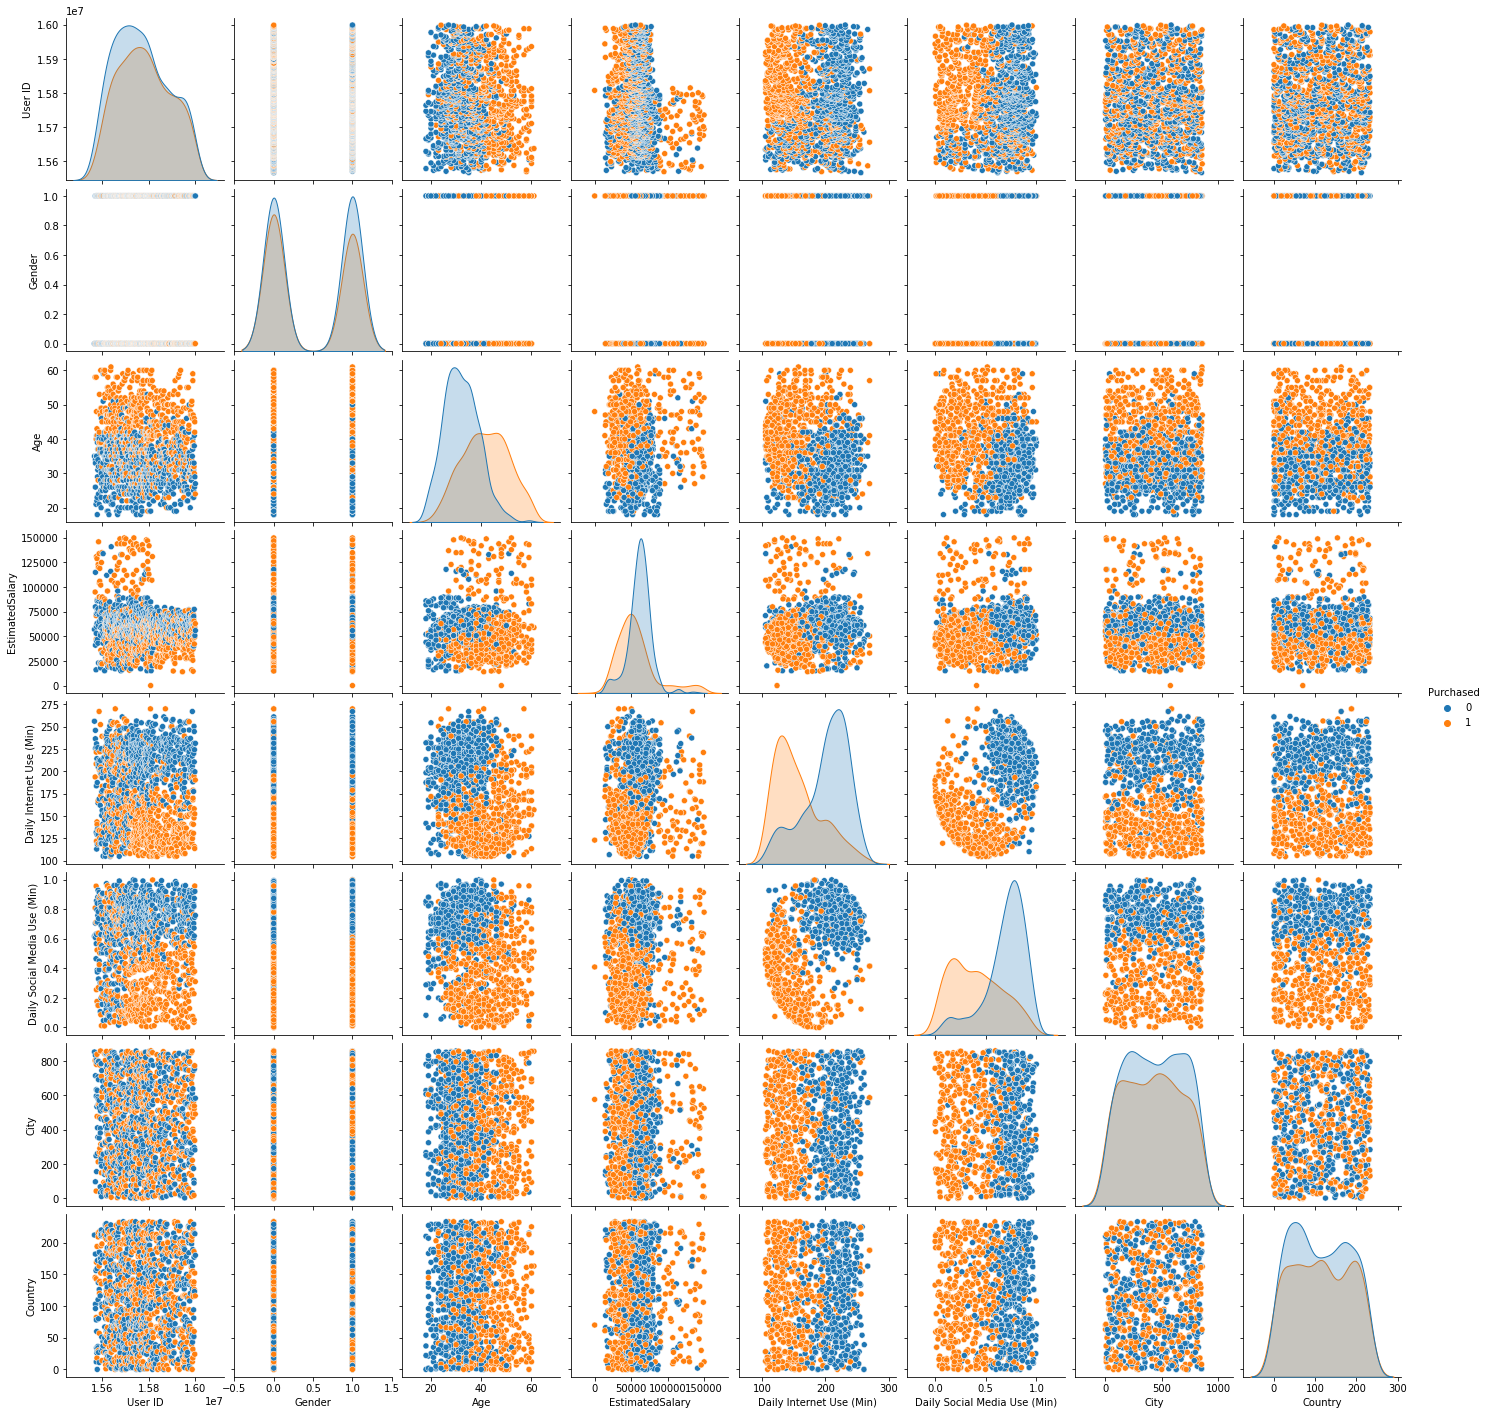

In [ ]:
sns.pairplot(df, hue="Purchased"); # data visualization

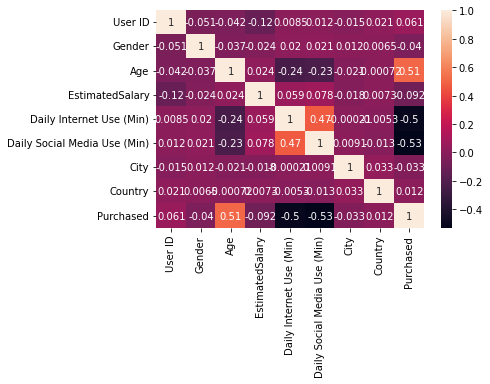

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True);

# Feature Extraction

In [ ]:
y = df['Purchased'] # label class stored in y
df=df.drop(['User ID'], axis = 1)
# df=df.drop(['City'], axis = 1)
# df=df.drop(['Country'], axis = 1)
# df=df.drop(['Daily Internet Use (Min)'], axis = 1)
# df=df.drop(['Daily Social Media Use (Min)'], axis = 1)
df

# df_one = pd.get_dummies(df["Gender"])
# df_one

,Gender,Age,EstimatedSalary,Daily Internet Use (Min),Daily Social Media Use (Min),City,Country,Purchased
0,0,35,57000.00,256.09,0.617882,852,212,0
1,0,58,95000.00,193.77,0.809621,802,145,1
2,0,26,80000.00,236.50,0.626721,97,182,0
3,1,34,115000.00,245.89,0.706272,833,103,0
4,0,33,41000.00,225.58,0.608023,714,96,0
...,...,...,...,...,...,...,...,...
1395,1,42,59419.78,113.75,0.380078,772,152,1
1396,0,45,49269.98,152.49,0.958185,337,24,1
1397,1,29,50820.74,199.62,0.921469,282,214,0
1398,0,24,62939.50,190.41,0.310556,491,116,1


# Cofusion Matrix plot

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix: '):
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  #plt.title('Confusion matrix')
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  

  thresh = cm.max() / 2.
  for i in range (cm.shape[0]):
    for j in range (cm.shape[1]):
      plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
      plt.tight_layout()
      plt.ylabel('True label')
      plt.xlabel('Predicted label')

# Plot Classification Report Function

In [ ]:
def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.Blues):

    lines = cr.split('\n')

    classes = []
    plotMat = []
    for line in lines[2 : (len(lines))-4]:
        t = line.split()
        classes.append(t[:])
        v = [float(x) for x in t[1: len(t)-1]]
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)

    plotMat = list(filter(None, plotMat))
   

    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(2)
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')
    #plt.grid( color='w', linestyle='-', linewidth=1)

# ROC AUC Curve

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
def plotROC(y_test, y_pred):
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)
  plt.figure(figsize=(4,4))
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],linestyle='--')
  plt.axis('tight')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

# **Model**

## LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

np.random.seed(42)
X_trainL, X_testL, y_trainL, y_testL = train_test_split(df, y, test_size=0.3)


model = LogisticRegression()
model.fit(X_trainL, y_trainL)

y_predsL = model.predict(X_testL)
#y_predsL
#print(len(y_predsL))
#model.score(X_testL, y_testL)
print('accuracy:',model.score(X_testL, y_testL)*100,'%')
print("Accuracy:",metrics.accuracy_score(y_testL, y_predsL))

#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

accuracy: 81.42857142857143 %
Accuracy: 0.8142857142857143


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
classification_Report_L = classification_report(y_testL, y_predsL)
print(classification_Report_L)

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       227
           1       0.79      0.81      0.80       193

    accuracy                           0.81       420
   macro avg       0.81      0.81      0.81       420
weighted avg       0.81      0.81      0.81       420



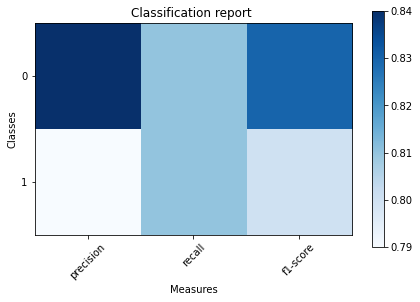

In [ ]:
plot_classification_report(classification_Report_L)

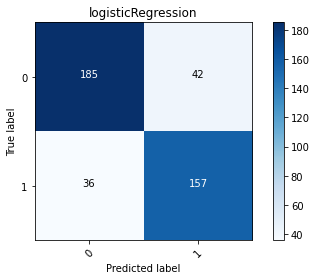

In [ ]:
dataL = confusion_matrix(y_testL, y_predsL)
plot_confusion_matrix(dataL, classes = range(2), title='logisticRegression')

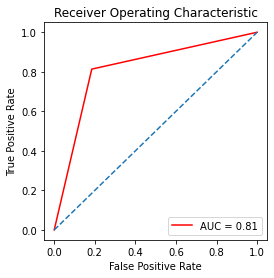

In [ ]:
plotROC(y_testL, y_predsL)

 ## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(42)

X_trainDT, X_testDT, y_trainDT, y_testDT = train_test_split(df, y, test_size=0.3, random_state=1)
# Create Decision Tree classifer object
#clf = DecisionTreeClassifier()
clf =DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_trainDT,y_trainDT)

#Predict the response for test dataset
y_predDT = clf.predict(X_testDT)
print("Accuracy:",metrics.accuracy_score(y_testDT, y_predDT))
print('accuracy:',clf.score(X_testDT, y_testDT)*100,'%')

Accuracy: 1.0
accuracy: 100.0 %


In [ ]:
#y_predDT = clf.predict(X_testDT)
classification_Report_DT = classification_report(y_testDT, y_predDT)
print(classification_Report_DT)
#plot_classification_report(classification_Report_DT,title='Classification report: DecisionTree')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       1.00      1.00      1.00       200

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00       420



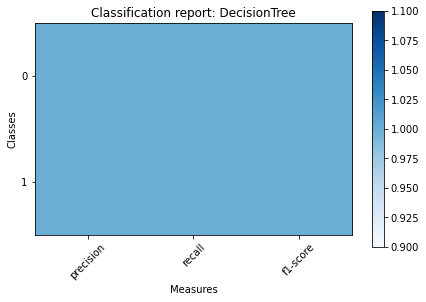

In [ ]:
plot_classification_report(classification_Report_DT,title='Classification report: DecisionTree')

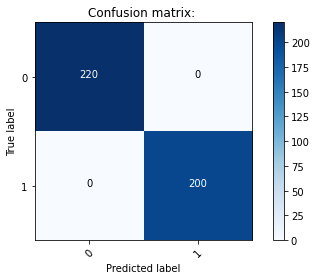

In [ ]:
dataDT = confusion_matrix(y_testDT, y_predDT)
plot_confusion_matrix(dataDT, classes = range(2))

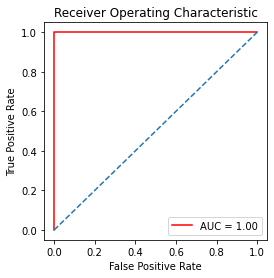

In [ ]:
plotROC(y_testDT, y_predDT)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X_trainRF, X_testRF, y_trainRF, y_testRF = train_test_split(df, y, test_size=0.3, random_state=1)
#Create a Gaussian Classifier
#clf_R=RandomForestClassifier(n_estimators=100)
clf_R=RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_R.fit(X_trainRF,y_trainRF)

y_predRF=clf_R.predict(X_testRF)
print("Accuracy:",metrics.accuracy_score(y_testRF, y_predRF))
print('accuracy:',clf_R.score(X_testRF, y_testRF)*100,'%')

Accuracy: 1.0
accuracy: 100.0 %


In [ ]:
classification_Report_RF = classification_report(y_testRF, y_predRF)
print(classification_Report_RF)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       1.00      1.00      1.00       200

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00       420



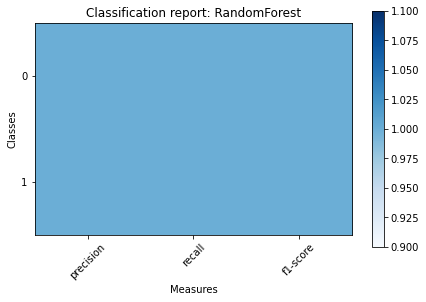

In [ ]:
plot_classification_report(classification_Report_RF,title='Classification report: RandomForest')

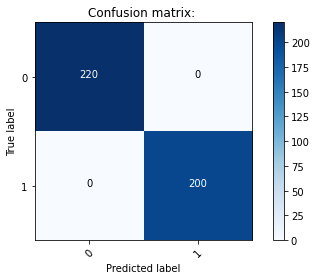

In [ ]:
dataRF = confusion_matrix(y_testRF, y_predRF)
plot_confusion_matrix(dataRF, classes = range(2))

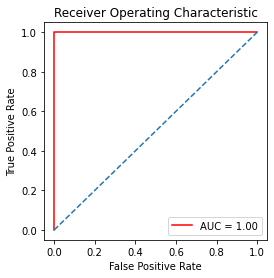

In [ ]:
plotROC(y_testRF, y_predRF)

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
np.random.seed(42)

X_trainNB, X_testNB, y_trainNB, y_testNB = train_test_split(df, y, test_size=0.3, random_state=1)
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_trainNB, y_trainNB)

#Predict the response for test dataset
y_predNB = gnb.predict(X_testNB)

print("Accuracy:",metrics.accuracy_score(y_testNB, y_predNB))
print('accuracy:',gnb.score(X_testNB, y_testNB)*100,'%')

Accuracy: 0.9023809523809524
accuracy: 90.23809523809524 %


In [ ]:
classification_Report_NB = classification_report(y_testNB, y_predNB)
print(classification_Report_NB)

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       220
           1       0.89      0.91      0.90       200

    accuracy                           0.90       420
   macro avg       0.90      0.90      0.90       420
weighted avg       0.90      0.90      0.90       420



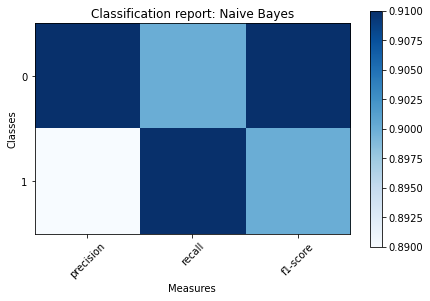

In [ ]:
plot_classification_report(classification_Report_NB,title='Classification report: Naive Bayes')

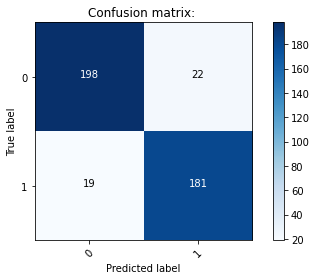

In [ ]:
dataNB = confusion_matrix(y_testNB, y_predNB)
plot_confusion_matrix(dataNB, classes = range(2))

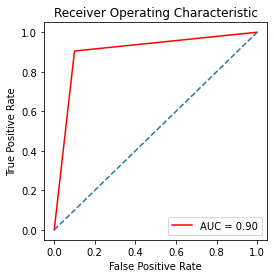

In [ ]:
plotROC(y_testNB, y_predNB)

## SVM

In [ ]:
from sklearn import svm
np.random.seed(42)

X_trainSVM, X_testSVM, y_trainSVM, y_testSVM = train_test_split(df, y, test_size=0.3, random_state=1)

#Create a svm Classifier
clf_SVM = svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
clf_SVM.fit(X_trainSVM, y_trainSVM)

#Predict the response for test dataset
y_predSVM = clf_SVM.predict(X_testSVM)


print("Accuracy:",metrics.accuracy_score(y_testSVM, y_predSVM))
print('accuracy:',clf_SVM.score(X_testSVM, y_testSVM)*100,'%')

Accuracy: 0.6571428571428571
accuracy: 65.71428571428571 %


In [ ]:
classification_Report_SVM = classification_report(y_testSVM, y_predSVM)
print(classification_Report_SVM)

              precision    recall  f1-score   support

           0       0.63      0.81      0.71       220
           1       0.70      0.48      0.57       200

    accuracy                           0.66       420
   macro avg       0.67      0.65      0.64       420
weighted avg       0.67      0.66      0.65       420



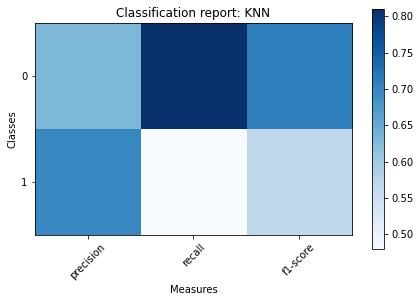

In [ ]:
plot_classification_report(classification_Report_SVM,title='Classification report: KNN')

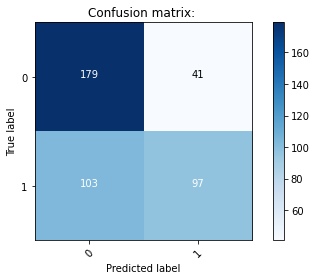

In [ ]:
dataSVM = confusion_matrix(y_testSVM, y_predSVM)
plot_confusion_matrix(dataSVM, classes = range(2))

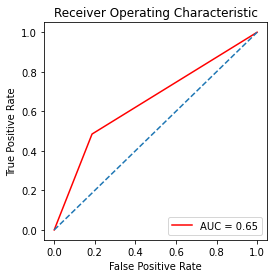

In [ ]:
plotROC(y_testSVM, y_predSVM)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)

X_trainK, X_testK, y_trainK, y_testK = train_test_split(df, y, test_size=0.3, random_state=1)
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_trainK, y_trainK)

#Predict the response for test dataset
y_predK = knn.predict(X_testK)

print("Accuracy:",metrics.accuracy_score(y_testK, y_predK))
print('accuracy:',knn.score(X_testK, y_testK)*100,'%')

Accuracy: 0.6238095238095238
accuracy: 62.38095238095238 %


In [ ]:
classification_Report_K = classification_report(y_testK, y_predK)
print(classification_Report_K)

              precision    recall  f1-score   support

           0       0.63      0.69      0.66       220
           1       0.62      0.55      0.58       200

    accuracy                           0.62       420
   macro avg       0.62      0.62      0.62       420
weighted avg       0.62      0.62      0.62       420



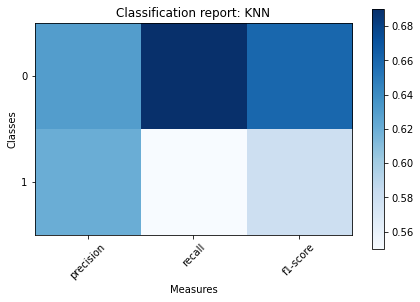

In [ ]:
plot_classification_report(classification_Report_K,title='Classification report: KNN')

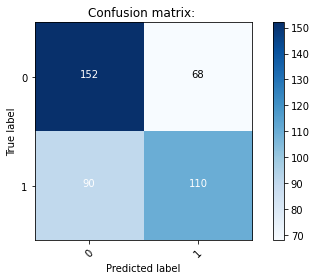

In [ ]:
dataK = confusion_matrix(y_testK, y_predK)
plot_confusion_matrix(dataK, classes = range(2))

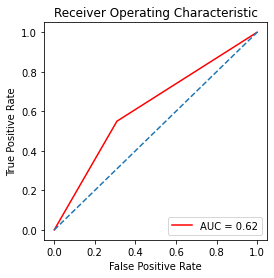

In [ ]:
plotROC(y_testK, y_predK)

## SGD

In [ ]:
df['EstimatedSalary'] = preprocessing.MinMaxScaler().fit_transform(df[['EstimatedSalary']])

In [ ]:
from sklearn.linear_model import SGDClassifier
np.random.seed(42)

X_trainSGD, X_testSGD, y_trainSGD, y_testSGD = train_test_split(df, y, test_size=0.3, random_state=1)

#clf_SGD = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
clf_SGD = SGDClassifier()
clf_SGD.fit(X_trainSGD, y_trainSGD)
#Pipeline(steps=[('standardscaler', StandardScaler()),('sgdclassifier', SGDClassifier())])
#print(clf_SGD.predict([[-0.8, -1]]))
y_predSGD = clf_SGD.predict(X_testSGD)
#y_predSGD = knn.predict(X_testK)
print("Accuracy:",metrics.accuracy_score(y_testSGD, y_predSGD))
print('accuracy:',clf_SGD.score(X_testSGD, y_testSGD)*100,'%')

Accuracy: 0.7452380952380953
accuracy: 74.52380952380952 %


In [ ]:
classification_Report_SGD = classification_report(y_testSGD, y_predSGD)
print(classification_Report_SGD)

              precision    recall  f1-score   support

           0       0.69      0.95      0.80       220
           1       0.90      0.52      0.66       200

    accuracy                           0.75       420
   macro avg       0.79      0.73      0.73       420
weighted avg       0.79      0.75      0.73       420



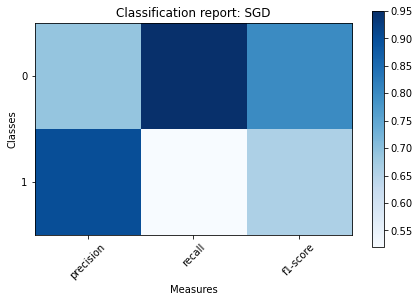

In [ ]:
plot_classification_report(classification_Report_SGD,title='Classification report: SGD')

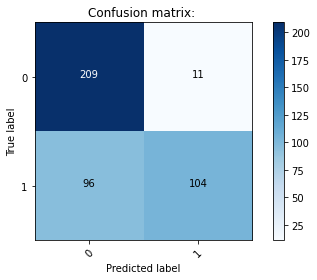

In [ ]:
data = confusion_matrix(y_testSGD, y_predSGD)
plot_confusion_matrix(data, classes = range(2))

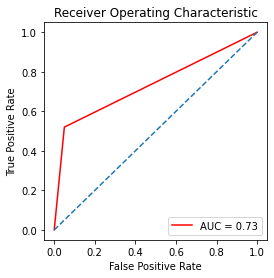

In [ ]:
plotROC(y_testSGD, y_predSGD)

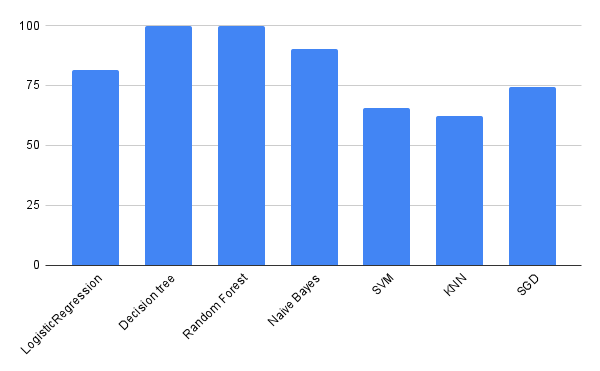